<a href="https://colab.research.google.com/github/nnttluna/genomic-data-science/blob/main/sequence_identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install biopython
import Bio
print (Bio.__version__)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 11.9 MB/s eta 0:00:00
1.83


In [ ]:
from Bio import SeqIO
record = list(SeqIO.parse("/content/drive/MyDrive/Portfolio/course/dna.example.fasta", "fasta"))
len(record)

25

In [ ]:
try:
  f = open("/content/drive/MyDrive/Portfolio/course/dna.example.fasta")
  print ("File imported")
except IOError:
  print ("File does not exist")

File imported


In [ ]:
# How many records are in the file? A record in a FASTA file is defined as a single-line header, followed by lines of sequence data. The header line is distinguished from the sequence data by a greater-than (">") symbol in the first column. The word following the ">" symbol is the identifier of the sequence, and the rest of the line is an optional description of the entry. There should be no space between the ">" and the first letter of the identifier.

In [ ]:
seqs = {}
for line in f: # discard new lines at the end
  line = line.rstrip()
  if line[0] =='>': # identify headers
    words = line.split()
    name = words[0][1:]
    seqs[name] = ''
  else:
    seqs[name] = seqs[name] + line

In [ ]:
print ('There are', len(seqs), 'records in this file')

for name,seq in seqs.items():
    print(name,'has length of', len(seq), ', complete sequence:', seq)





There are 25 records in this file
gi|142022655|gb|EQ086233.1|43 has length of 990 , complete sequence: TCGGGCGAAGGCGGCAGCAAGTCGTCCACGCGCAGCGCGGCACCGCGGGCCTCTGCCGTGCGCTGCTTGGCCATGGCCTCCAGCGCACCGATCGGATCAAAGCCGCTGAAGCCTTCGCGCATCAGGCGGCCATAGTTGGCGCCAGTGACCGTACCAACCGCCTTGATGCGGCGCTCGGTCATCGCTGCATTGATCGAGTAGCCACCGCCGCCGCAAATGCCCAGCACGCCAATGCGTTCTTCATCCACATAGGGGAGCGTTACGAGGTAGTCGCAGACCACGCGGAAATCCTCGACGCGCAGTGTCGGGTCTTCGGTAAAACGTGGTTCGCCGCCGCTGGCACCCTGGAAGCTGGCGTCGAAGGCGATGACGACGAAACCTTCCTTGGCCAGCGCCTCGCCATACACGTTCCCCGATGTTTGCTCCTTGCAGCTGCCGATCGGATGCGCGCTGATGATGGCGGGATATTTCTTGCCTTCGTCGAAGTTCGGCGGGAAGTGGATGTCGGCTGCGATATCCCAATACACATTCTTGATCTTGACGCTTTTCATGACAGCTCCGTTCAGGGGGAGGGGGTAAGTTCGCCAGGCCGAATCGTTGGTAGCCAAGCGGCAACGACTCGAATATAGAGAGCCGATTGGAATTCCGTAAGATCGCAATCTGGACTACAGTGGTATCTTCAAATTGACAATGGCACCTACATGGATCCCTCACTGCTTCCGTCTCTCGCGTGGTTCGCCCACGTCGCACATCATCGTAGCTTCACGAAAGCGGCTGCGGAAATGGGCGTTTCTCGAGCAAACCTGTCGCAGAACGTGAAGGCGCTCGAACGCCGGTTGAACGTCAAGCTGCTGTATCGAACGACTCGCGACATGTCGCTGACCGAGGAGGGGCAGC

In [ ]:
#What are the lengths of the sequences in the file? What is the longest sequence and what is the shortest sequence? Is there more than one longest or shortest sequence? What are their identifiers?

In [ ]:
i = 0
j = 0
largest_seq = list(seqs.values())[i]
for i in range (0,len(seqs)-1):
  if len(largest_seq) < len(list(seqs.values())[i+1]):
     largest_seq = list(seqs.values())[i+1]
     j=i+1
  i=i+1
print('Complete sequence of the longest record is', largest_seq)
print('Longest record is at index number', j)
print('Length of the Longest record is', (len(largest_seq)))
print('Genome ID of the longest record is', list(seqs)[j])

i = 0
count = 0
for i in range (0,len(seqs)-1):
  if len(list(seqs.values())[i]) == len(largest_seq):
    count=count+1
  i=i+1

print('The dataset has', count, 'record(s) with the length', (len(largest_seq)),'(longest)')

Complete sequence of the longest record is ACGCCCGGCGCACCGCGAGTACCGCGCCGCCGGGCACTCCTTGACCCCGCATGATCGATTCCCGATGAAACCCGAAAACCTCGTCGCCTGCCACGAATGCGACCTGCTGTTTTGGCGGCCGCCGCGCTTGCGCGCGCTGGCTGCGCACTGCCCGAGGTGCCGTGCCCGCGTGGGCGGCAGCGCGCACGGCCGTCCGGCGCTCGACCGGCGGTGCGCGATCGCGCTCGCCGCGCTGTTCACGCTCTTCATCGCGCAGGCCTTTCCCATCGTCGCGCTCGACGCCGCCGGCATCGCATCGCACGCGACGCTGGCCGACGCGGTGGCCGCGTTGCGCTTGAACGGGCAACCGGCGGTGGCGGCGATCGTGTTCTGCACGACGATGTTGTTCCCGCTGCTGGAACTCGCCGCGTGGCTGTACGTGCTCGTACCGTTGCGCGCGGGCCGCGTACCGCCCCGCTTCGAGCCGGTCCTGCGCAACATGCAGCGGCTGCGCCCGTGGAGCATGGTCGAGGTGTTCCTGCTCGGCATCCTGGTCACGATCGTCAAGATGACGAGCCTCGCGCACGTGATACCGGGCCCCGCGCTGTTTGCGTTCGGCGCCCTCACCGTGTTGCTCGGCTTTCTCGCGTCATTCGACCCGGGCGGCCTGTGGGAAGCGCGCGACGAAATCATCGCGCTGCGCGGCGGCGGTACGTCCGCCGCGGTATCGCGCCGGCGGCACACGCCGCGACGCGCTGCACCGGTGACGCCCGACACAGCGGACGCAACGAACGCGACCGGCGCGACCGGGCGCCACCGCTCGGCAAGCGTCACGGCCCGCGCCGCGGGGCTGGTCGCATGTCATACCTGCGGACGCGTGCAACCGCATACCGAAGCCGCCGACGCGCGCTGCACGCGCTGCGGTTCGACGCTGCACGAACGCCGCCCGCGCAGCGCCGCACGCACGGGCGCGCTCGT

In [ ]:
m = 0
n = 0
shortest_seq = list(seqs.values())[m]
for m in range (0,len(seqs)-1):
  if len(shortest_seq) > len(list(seqs.values())[m+1]):
     shortest_seq = list(seqs.values())[m+1]
     n=m+1
  m=m+1
print('Complete sequence of the shortest record is', shortest_seq)
print('Shortest record is at index number', n)
print('Length of the shortest record is', (len(shortest_seq)))
print('Genome ID of the shortest record is', list(seqs)[n])

n = 0
count = 0
for n in range (0,len(seqs)-1):
  if len(list(seqs.values())[n]) == len(shortest_seq):
    count=count+1
  n=n+1

print('The dataset has', count, 'record(s) with the length', (len(shortest_seq)),'(shortest)')

Complete sequence of the shortest record is CGTTGTTCGCCAGGTCGTCCGCATAGCCGGCCGAGCTGAACTGCGTGACATACGGGCGAATCTTCTTCAGCACGTCGTAGGCAGCCTGGTAGTCGGCCGGGTTCTTGCTCTCCGGGTCCTTGCCCATGTACTGCAGCGCCGCCGCGAACGCGGCGTCCGGCGCGTCGAGCAGCGAGATGCCGCAGCCCTTCAGCTTCGCCGCGTTCGCCGGGTCGAACAGCAGCGCCCAGCTGTCGGTCGGTGCGTTGTCGCCGAGCCGCTTCCTGACCGCCTCGACGTTGTAGCCGATCCCCGTCGTGCCCCACGCCCACGGCACACCGTACTGGTTGCCCGGGTCGGCCTTCGCGACCATCTTCATCAGCACCGGGTCGAGGTTCGCGAGATTCGGCAGCTTCGACTTGTCGAGCTTCTGGTACACGCCGGCCTGGATCTGCTGCGCGAGATAGTTCGACGTCGGCACGACGATGTCGTAGCCCGAGCTGCCCGCAAGCAGCTTCGTCTGCAGCGTATCG
Shortest record is at index number 7
Length of the shortest record is 512
Genome ID of the shortest record is gi|142022655|gb|EQ086233.1|521
The dataset has 1 record(s) with the length 512 (shortest)


In [ ]:
#what is the length of the longest ORF in the file? What is the identifier of the sequence containing the longest ORF? For a given sequence identifier, what is the longest ORF contained in the sequence represented by that identifier? What is the starting position of the longest ORF in the sequence that contains it? The position should indicate the character number in the sequence.

In [ ]:
def start_codon_at(seq, reading_frame):
  j=[]
  start_codon = ["ATG"]
  start_codon_found = False
  for i in range(reading_frame-1,len(seq),3):
    codon = seq[i:i+3]
    if codon in start_codon:
      start_codon_found = True
      j.append(i)
  return j

def stop_codon_at(seq, reading_frame):
  j=[]
  stop_codon = ["TAA","TAG","TGA"]
  stop_codon_found = False
  for i in range(reading_frame-1,len(seq),3):
    codon = seq[i:i+3]
    if codon in stop_codon:
      stop_codon_found = True
      j.append(i)
  return j


In [ ]:
i = 0
j = 0
global_longest_ORF = 0
seq_name =[]
ORF = []
for i in range (0,len(seqs)):
  have_ORF = False
  local_longest_ORF = 0
  for rf in range (1,4):
    srt = start_codon_at(list(seqs.values())[i],rf)
    stp = stop_codon_at(list(seqs.values())[i],rf)
    if len(srt) > 0 and len(stp) > 0:
        have_ORF = True
        ORF_length = stp[-1] + 2 - srt[0]
        if ORF_length > local_longest_ORF:
          starting_point = srt[0]
          local_longest_ORF = ORF_length
        if ORF_length > global_longest_ORF:
          global_longest_ORF = ORF_length
          j=i
    rf=rf+1
  if have_ORF == True:
    print(list(seqs)[i],'has the longest ORF of', local_longest_ORF,'start at position',starting_point)
  else:
    print(list(seqs)[i],'has no valid ORF')
  seq_name.append(list(seqs)[i])
  ORF.append(local_longest_ORF)
  i=i+1

print('The longest ORF in the dataset has the length of', global_longest_ORF, 'within the sequence ID', list(seqs)[j])





gi|142022655|gb|EQ086233.1|43 has the longest ORF of 914 start at position 72
gi|142022655|gb|EQ086233.1|160 has the longest ORF of 635 start at position 74
gi|142022655|gb|EQ086233.1|41 has the longest ORF of 2999 start at position 74
gi|142022655|gb|EQ086233.1|221 has the longest ORF of 2741 start at position 62
gi|142022655|gb|EQ086233.1|294 has the longest ORF of 3749 start at position 79
gi|142022655|gb|EQ086233.1|323 has the longest ORF of 4652 start at position 96
gi|142022655|gb|EQ086233.1|564 has the longest ORF of 1634 start at position 9
gi|142022655|gb|EQ086233.1|521 has the longest ORF of 347 start at position 125
gi|142022655|gb|EQ086233.1|455 has the longest ORF of 551 start at position 85
gi|142022655|gb|EQ086233.1|229 has the longest ORF of 2864 start at position 124
gi|142022655|gb|EQ086233.1|422 has the longest ORF of 1106 start at position 42
gi|142022655|gb|EQ086233.1|384 has the longest ORF of 3410 start at position 11
gi|142022655|gb|EQ086233.1|280 has the longes

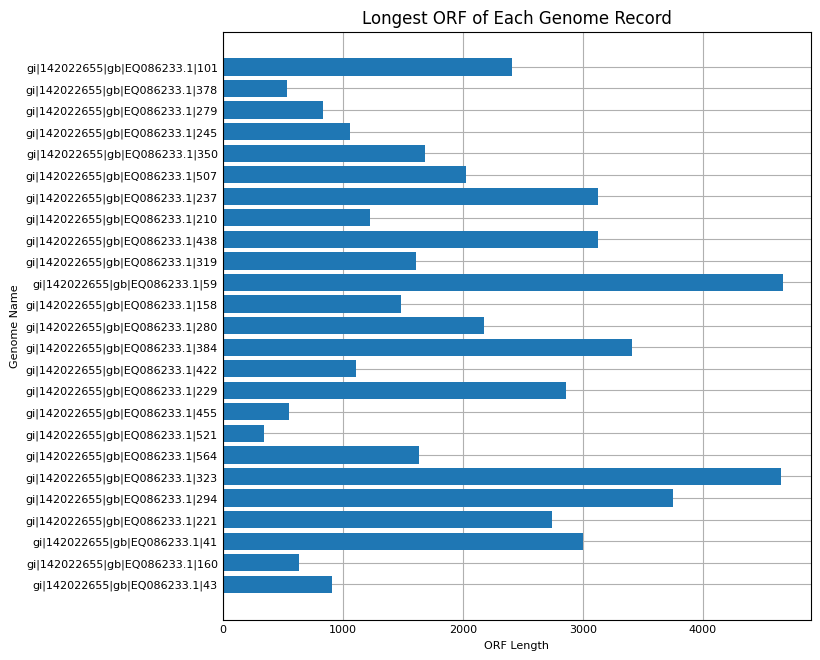

In [68]:
import matplotlib.pyplot as plt
import numpy as np

#data = np.vstack((seq_name, ORF))

#plt.figure(figsize=(8,8),edgecolor='blue')
#plt.hist(data, bins=15, orientation='horizontal')
#plt.gca().invert_yaxis()
#plt.show()

plt.style.use('_mpl-gallery')

# make data:
x = seq_name
y = ORF

# plot

fig, ax = plt.subplots(figsize=(6,6))
y_pos = np.arange(len(seq_name))
plt.gca().invert_yaxis()

ax.barh(x, y, align='center')
ax.set_yticks(y_pos, labels=seq_name)
ax.invert_yaxis()  # labels read top-to-bottom

# creating a dictionary
font = {'size': 12}

# using rc function
#plt.rc('font', **font)

# plotting a plot
#plt.plot(x, y)

# setting title name
plt.title("Longest ORF of Each Genome Record", fontsize=12)

# setting x axis label
plt.ylabel("Genome Name")

# setting y axis label
plt.xlabel("ORF Length")

#ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
#       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

In [ ]:
# dentify all repeats of length n in all sequences; determine how many times each repeat occurs in the file, and which is the most frequent repeat of a given length

In [ ]:
def break_seq (seq,size):
  break_codons_string = []
  reading_frame = 0
  for reading_frame in range(0,3):
    string_by_rf =[]
    delta = len(seq)%3
    #for z in range(0, 3-delta):
    #  seq+='N'
    #  z=z+1
    i = reading_frame
    stop_point = len(seq) - len(seq)%size
    for i in range(reading_frame,stop_point,size):
      codon = seq[i:i+size]
      string_by_rf.append(codon)
    break_codons_string.append(string_by_rf)
  return break_codons_string

In [ ]:
print(break_seq(list(seqs.values())[1],6))
for l in break_seq(list(seqs.values())[1],6):
    print(*[e[0] for e in l])
import numpy as np
substrings_np = np.array(break_seq(list(seqs.values())[1],6))
print (substrings_np[0,:])

[['ATTGGG', 'GAGGAG', 'GCGAGT', 'TGAGCG', 'GCGGCA', 'GTTCGC', 'CTGCGT', 'GCGCTG', 'CGCGGC', 'GTCGAC', 'ATCTGA', 'TCCGCA', 'CCATGG', 'AAATCC', 'CCGCTC', 'AATCTT', 'TGGAGC', 'AGGGAT', 'GCGGGG', 'CGATCA', 'AGATGG', 'GGATGC', 'GGGATG', 'GGGGCG', 'ACGGTG', 'TATTTC', 'CGCCAG', 'AAGATT', 'TCGCCG', 'CGGGAG', 'CTCGCG', 'GTGCGT', 'ACGTGC', 'ATGTTC', 'AAACGC', 'ACGGTG', 'CGCGCA', 'TGGCAG', 'TGGCAG', 'ACTGAT', 'CAACGC', 'AGCTGG', 'AAGCAT', 'CCGAAG', 'CGCGCG', 'GGCACG', 'CGTGTC', 'CTCGAC', 'GCGTGG', 'CCTCAC', 'ATGCTG', 'TCGGGT', 'CGGTTC', 'AAGACC', 'GAAAGC', 'CACCGA', 'CCGACG', 'CGCGAG', 'CAATGC', 'GCTACG', 'CGGATC', 'GCGTTC', 'GACACG', 'AGCCGC', 'GCGCGA', 'GGCAAG', 'GCCGAC', 'GTATTC', 'GATCTT', 'CCAGAG', 'GAAGCC', 'TATTGG', 'CTCGAG', 'TCGTAG', 'TGCTCG', 'ATATGG', 'TAGAGC', 'AACATG', 'AATCCC', 'GGGCTA', 'AGTACA', 'AGAAGT', 'AACCCG', 'GCAACG', 'AGTGAG', 'ATTGCG', 'ACGAAT', 'AAACGC', 'TTCACC', 'ATGATC', 'GCGCTC', 'CTGAGT', 'TGGTTG', 'AGGTGA', 'ATTGGA', 'AAGTCG', 'ATTCCT', 'GGGGGA', 'TCATTC', 'CCGGCA'

In [ ]:
s = 5
void = ['N','NN','NNN']
global_repeated_substrings= []
global_repeated_count = []
for i in range (0,len(seqs)):

  reading_rf1 = np.array(break_seq(list(seqs.values())[i],s))[0,:]
  reading_rf2 = np.array(break_seq(list(seqs.values())[i],s))[1,:]
  reading_rf3 = np.array(break_seq(list(seqs.values())[i],s))[2,:]
  j = 0
  repeated_substrings = []
  repeated_count = []
  for j in range(0,len(reading_rf1)):
    if reading_rf1[j] not in void and reading_rf1[j] in reading_rf2:
      if reading_rf1[j] in repeated_substrings:
        for k in range(0, len(repeated_substrings)):
          if repeated_substrings[k] == reading_rf1[j]:
            index = k
          k=k+1
        repeated_count[index]=repeated_count[index]+1
      else:
        repeated_substrings.append(reading_rf1[j])
        repeated_count.append(1)

  j=0
  for j in range(0,len(reading_rf1)):
    if reading_rf1[j] not in void and reading_rf1[j] in reading_rf3:
      if reading_rf1[j] in repeated_substrings:
        for k in range(0, len(repeated_substrings)):
          if repeated_substrings[k] == reading_rf1[j]:
            index = k
        repeated_count[index]=repeated_count[index]+1
      else:
        repeated_substrings.append(reading_rf1[j])
        repeated_count.append(1)

  j=0
  for j in range(0,len(reading_rf2)):
    if reading_rf2[j] not in void and reading_rf2[j] in reading_rf3:
      if reading_rf2[j] in repeated_substrings:
        for k in range(0, len(repeated_substrings)):
          if repeated_substrings[k] == reading_rf2[j]:
            index = k
          k=k+1
        repeated_count[index]=repeated_count[index]+1
      else:
        repeated_substrings.append(reading_rf2[j])
        repeated_count.append(1)
  print(list(seqs)[i], ': ', end="")
  if repeated_substrings == []:
    print('no repeated substrings of size', s)
  else:
    max_index = 0
    list_len = len(repeated_count)
    for index in range(list_len):
      if repeated_count[index] > repeated_count[max_index]:
        max_index = index
    print("the most frequent repeat of length", s ,':', repeated_substrings[max_index], 'with', repeated_count[max_index],'times.')
    for x in range (0,len(repeated_substrings)):
      if repeated_substrings[x] in global_repeated_substrings:
        for y in range (0,len(global_repeated_substrings)):
          if global_repeated_substrings[y] == repeated_substrings[x]:
            index2 = y
        global_repeated_count[index2]=global_repeated_count[index2]+repeated_count[x]
      else:
            global_repeated_substrings.append(repeated_substrings[x])
            global_repeated_count.append(1)
      print (repeated_substrings[x], 'repeats',repeated_count[x],'time(s)', end="")
      if x < len(repeated_substrings)-1:
        print (', ', end="")
      else:
        print('.')
print('In this dataset, for substring with length', s)
for p in range (0,len(global_repeated_substrings)):
  print(global_repeated_substrings[p], 'repeats', global_repeated_count[p], 'time(s)' ,end="")
  if x < len(global_repeated_substrings)-1:
    print (', ', end="")
  else:
    print('.')


gi|142022655|gb|EQ086233.1|43 : the most frequent repeat of length 5 : GCGGC with 9 times.
CGAAG repeats 1 time(s), GCGGC repeats 9 time(s), AGCAA repeats 1 time(s), CGCAG repeats 3 time(s), CGGGC repeats 1 time(s), CGCTG repeats 5 time(s), AGCCG repeats 3 time(s), CGCGC repeats 2 time(s), TTGGC repeats 1 time(s), ATGCG repeats 1 time(s), GCGCT repeats 7 time(s), CGCCG repeats 2 time(s), TCATC repeats 1 time(s), TCGCA repeats 1 time(s), CGACG repeats 3 time(s), AGCGC repeats 1 time(s), AGCTG repeats 1 time(s), CGGGA repeats 1 time(s), TCGAA repeats 5 time(s), CGGCT repeats 1 time(s), CTTGA repeats 1 time(s), GCTCC repeats 1 time(s), GGGGG repeats 1 time(s), TTCGC repeats 1 time(s), GTAGC repeats 3 time(s), CGACT repeats 1 time(s), GAGCC repeats 1 time(s), ATGGC repeats 3 time(s), CATGG repeats 1 time(s), TCGCC repeats 4 time(s), TGCGG repeats 1 time(s), AACCT repeats 1 time(s), GTCGC repeats 1 time(s), ACGTC repeats 1 time(s), TCGCG repeats 3 time(s), TCGCT repeats 1 time(s), GACCG rep

In [ ]:
max_index = 0
list_len = len(global_repeated_count)
for index in range(list_len):
    if global_repeated_count[index] > global_repeated_count[max_index]:
        max_index = index
print("The most frequent repeat of length",s ,'in the dataset is', global_repeated_substrings[max_index], 'with', global_repeated_count[max_index],'times.')

The most frequent repeat of length 5 in the dataset is GCGCG with 260 times.


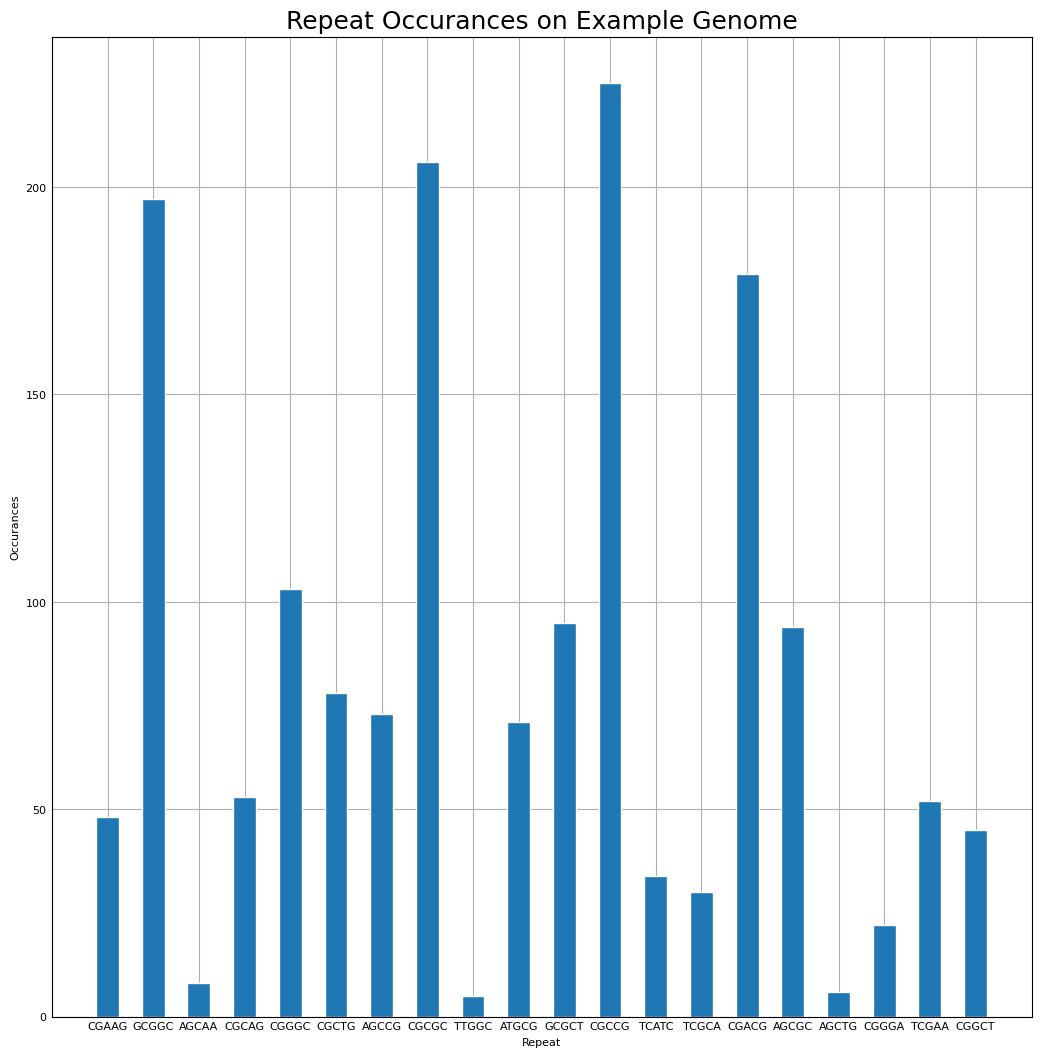

In [66]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')

# make data:
x = global_repeated_substrings[:20]
y = global_repeated_count[:20]

# plot
fig, ax = plt.subplots(figsize=(10,10))

ax.bar(x, y, edgecolor="white", width=0.5)


# plotting a plot
#plt.plot(x, y)

# setting title name
plt.title("Repeat Occurances on Example Genome", fontsize=18)

# setting x axis label
plt.xlabel("Repeat")

# setting y axis label
plt.ylabel("Occurances")

#ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
#       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()